In [1]:
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import requests

In [2]:
furl = 'https://spotleai.sgp1.digitaloceanspaces.com/course/data/tweets_bollywood.txt'
response = requests.get(furl)
tweets = response.text.split("\n")

In [3]:
tweets

['I wish I loved &amp; admired my body just as much as my boyfriend doesð\x9f\x98©',
 "Let's get this straight. It's a COMPLETE BLASPHEMY! That Fuckin' YRF isn't GOD. If THEY are not gonna Make anything with SRK then It's OK. There are many Good Directors, who can bring out the LARGER than LIFE ATTITUDE of SRK on the BIG Screen, JUST 1 STRONG SCRIPT. ð\x9f\x94¥",
 '#SRK.â\x9d¤ï¸\x8fð\x9f\x94¥.',
 '@realDonaldTrump 4-10-20 captivating, I would search for Roger, KATRINA 2016. unfortunate US citizen can be ruined, taken out, drug smugglers get a lesser sentence.  Itâ\x80\x99s a sad moment.  Please pardon him.  Wikileaks is bad for exposing debate cheats, election fraud, and DNC corruption 50 to life!',
 'Incredible logic !     ',
 '',
 'My wife got offended when I told her, she is my strength.',
 'She said" that means, other women are your weaknesses !"ð\x9f\x98\x82ð\x9f\x98\x81',
 '@katrina_wiser @sgonnawin2020 @RepStefanik Great work! Get it in the record!',
 'I feel like I been giving 

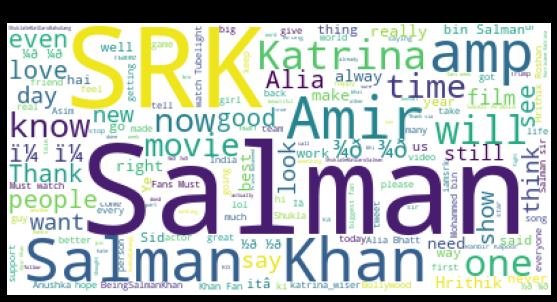

In [4]:
def word_cloud(tweets):
  stopwords = set(STOPWORDS)
  wordcloud = WordCloud(background_color="white", stopwords=stopwords, random_state = 2016).generate(" ".join([tw for tw in tweets]))
  plt.figure( figsize=(10,5), facecolor='k')
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title("Twitter WordCloud")
word_cloud(tweets)

In [5]:
raw = ' '.join(tweets)
tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("@")]]
df = pd.DataFrame({"tags": tags})

In [6]:
print(df['tags'].value_counts().head(25))

katrina_wiser      811
BeingSalmanKhan    717
iamsrk             444
BiggBoss           253
ColorsTV           237
Neha_hrithik       200
ShivaayXannika     184
RealKrutika        173
iHrithik           165
RepMattGaetz       154
oZaalimaa          136
RepStefanik        135
Vivo_India         133
Sister_Alia        131
yehmalaalishq      126
PDdancing          125
akshaykumar        122
realDonaldTrump    118
sambhavnaseth      113
sidharth_shukla    112
shahrukhdevdas     111
SKFilmsOfficial    109
sonakshisinha      104
arbaazSkhan        104
katrina_hutch      102
Name: tags, dtype: int64


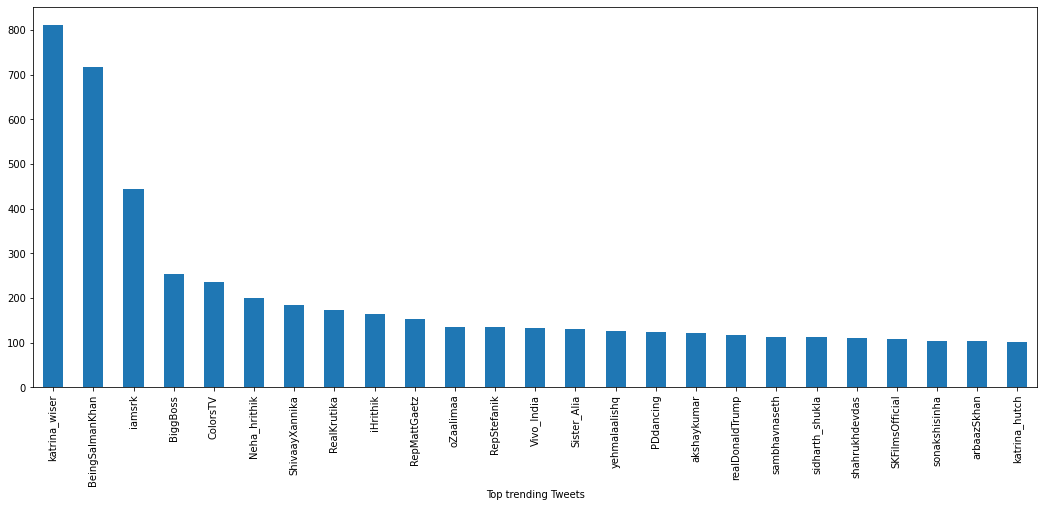

In [7]:
fig, ax = plt.subplots()
plt.xlabel('Top trending Tweets')
df['tags'].value_counts().head(25).plot(ax=ax, kind='bar',figsize=(18,7))

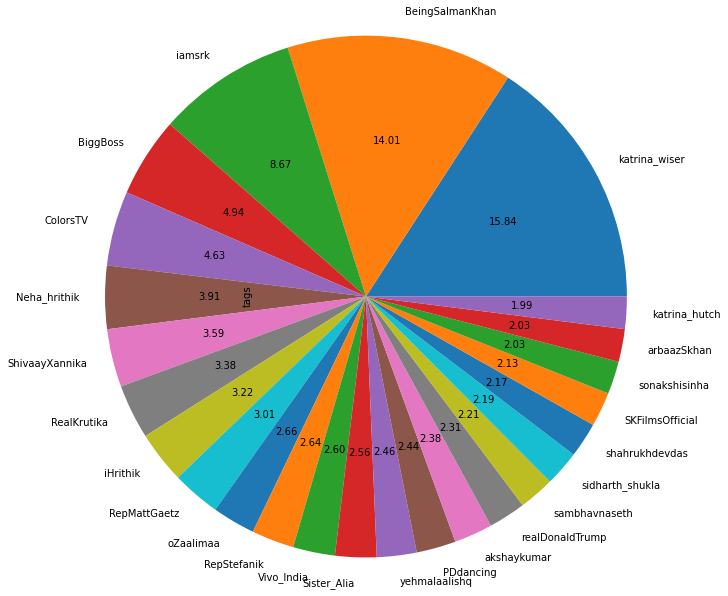

In [8]:
df['tags'].value_counts().head(25).plot(kind='pie', autopct='%.2f', radius=3)

In [9]:
trends=df['tags'].value_counts().head(25);
dictionary = trends.to_dict()
value=list(trends)
trend=[*dictionary]
optimized_trends=['Katrina Kaif','Salmaan Khan','Shahrukh Khan','Salmaan Khan','Others','Neha Hritik','Others','Kritika Yadadv','Hritik Roshan','Others','Shahrukh Khan','Others','Others','Alia Bhatt','Others','Others','Akshay Kumar','Others', 'Sambhavana Seth','Sidharth Shukla', 'Shahrukh Khan', 'Salmaan Khan', 'Arbaaz Khan','Sonakshi Sinha','Katrina kaif']
odf = pd.DataFrame({"tags": trend, 'number':value,'trend':optimized_trends})
print(odf)

               tags  number            trend
0     katrina_wiser     811     Katrina Kaif
1   BeingSalmanKhan     717     Salmaan Khan
2            iamsrk     444    Shahrukh Khan
3          BiggBoss     253     Salmaan Khan
4          ColorsTV     237           Others
5      Neha_hrithik     200      Neha Hritik
6    ShivaayXannika     184           Others
7       RealKrutika     173   Kritika Yadadv
8          iHrithik     165    Hritik Roshan
9      RepMattGaetz     154           Others
10        oZaalimaa     136    Shahrukh Khan
11      RepStefanik     135           Others
12       Vivo_India     133           Others
13      Sister_Alia     131       Alia Bhatt
14    yehmalaalishq     126           Others
15        PDdancing     125           Others
16      akshaykumar     122     Akshay Kumar
17  realDonaldTrump     118           Others
18    sambhavnaseth     113  Sambhavana Seth
19  sidharth_shukla     112  Sidharth Shukla
20   shahrukhdevdas     111    Shahrukh Khan
21  SKFilm

In [10]:
data= odf.groupby(['trend'])['number'].agg('sum')
final=data.sum()
print(data)

trend
Akshay Kumar        122
Alia Bhatt          131
Arbaaz Khan         104
Hritik Roshan       165
Katrina Kaif        811
Katrina kaif        102
Kritika Yadadv      173
Neha Hritik         200
Others             1212
Salmaan Khan       1079
Sambhavana Seth     113
Shahrukh Khan       691
Sidharth Shukla     112
Sonakshi Sinha      104
Name: number, dtype: int64


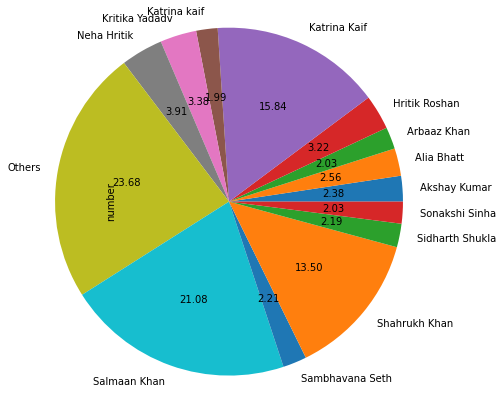

In [11]:
data.plot(kind='pie', autopct='%.2f', radius=2);